# Importing necessary libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from datetime import timedelta

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Importing Data

In [5]:
customers_df = pd.read_csv('/kaggle/input/zeotap/Data/Customers.csv')
products_df = pd.read_csv('/kaggle/input/zeotap/Data/Products.csv')
transactions_df = pd.read_csv('/kaggle/input/zeotap/Data/Transactions.csv')

`Assumed the dollar as the currency for the transaction.`

# Basic Data Exploration

In [44]:
def explore_dataframe(df, name):
    print(f"\n{'-'*20} {name} Dataset {'-'*20}")
    print("\nData shape:")
    print(df.shape)
    print("\nFirst 10 rows:")
    display(df.head(10))
    print("\nFew random rows:")
    print(df.sample(5))
    print("\nData Info:")
    print(df.info())
    print("\nDescriptive Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print(f"\n{'-'*40}")

In [45]:
explore_dataframe(customers_df, 'Customers')


-------------------- Customers Dataset --------------------

Data shape:
(200, 4)

First 10 rows:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15



Few random rows:
    CustomerID         CustomerName         Region SignupDate
190      C0191  Samantha Gibson DVM  South America 2024-04-07
102      C0103       Jennifer Munoz         Europe 2022-05-15
14       C0015           Tina Duran  North America 2023-11-20
194      C0195    Jeremy Mclaughlin  South America 2024-09-17
9        C0010            Aaron Cox         Europe 2022-12-15

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Descriptive Statistics:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:

### Findings
* The dataset contains **200 unique customer records** with no missing values.
* The `Region` column has only **4 unique values**, indicating that the customers are from a limited number of regions.
* The `SignupDate` column has **179 unique dates**, suggesting that there are some dates with multiple customer signups.
* The most common region is **South America** with 59 occurrences, as seen in the descriptive statistics.

In [46]:
explore_dataframe(products_df, 'Products')


-------------------- Products Dataset --------------------

Data shape:
(100, 4)

First 10 rows:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
5,P006,ActiveWear Rug,Home Decor,121.32
6,P007,SoundWave Cookbook,Books,420.15
7,P008,BookWorld Bluetooth Speaker,Electronics,146.85
8,P009,BookWorld Wall Art,Home Decor,325.01
9,P010,ComfortLiving Smartwatch,Electronics,350.13



Few random rows:
   ProductID              ProductName     Category   Price
19      P020        ActiveWear Jacket     Clothing  396.34
82      P083    ActiveWear Smartwatch  Electronics  455.72
89      P090  ComfortLiving Biography        Books  165.30
6       P007       SoundWave Cookbook        Books  420.15
59      P060        HomeSense T-Shirt     Clothing  155.65

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Descriptive Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Missing Values:


### Findings
* The dataset contains **100 unique product records** with no missing values.
* The `Price` column has a `mean` value of `$267.55` and a `standard deviation` of `$143.22`, indicating a moderate level of price variation.
* The `cheapest product` costs `$16.08` and the `most expensive product` costs `$497.76`, showing a wide range of prices.
* The **median price is $292.88**, which is slightly higher than the mean, suggesting that the price distribution might be slightly skewed to the left.

In [49]:
explore_dataframe(transactions_df, 'Transactions')


-------------------- Transactions Dataset --------------------

Data shape:
(1000, 7)

First 10 rows:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68



Few random rows:
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
782        T00673      C0102      P029 2024-09-01 21:40:35         3   
961        T00654      C0054      P098 2024-07-07 12:28:18         4   
36         T00962      C0188      P057 2024-11-29 19:49:24         2   
987        T00379      C0004      P077 2024-12-23 14:13:52         4   
330        T00738      C0157      P013 2024-03-19 16:14:11         3   

     TotalValue   Price  
782     1300.92  433.64  
961     1199.72  299.93  
36       479.40  239.70  
987     1062.04  265.51  
330      342.60  114.20  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   Transa

### Findings
* The dataset contains **1000 unique transaction records** with no missing values.
* The **average transaction quantity is 2.54(≡3) items** and the **average total transaction value is `$689.99`**, indicating a moderate level of spending per transaction.
* The **average price per item is `$272.55`**, with a **standard deviation of `$140.74`**, suggesting a wide range of prices for different products.
* The **most expensive transaction is `$1991.04`**, while the **cheapest transaction is `$16.08`**, showing a significant variation in transaction values.

> Transaction Datess and SignupDate need to  be converted to DT object.

In [22]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# EDA

### Customer Distribution by Region


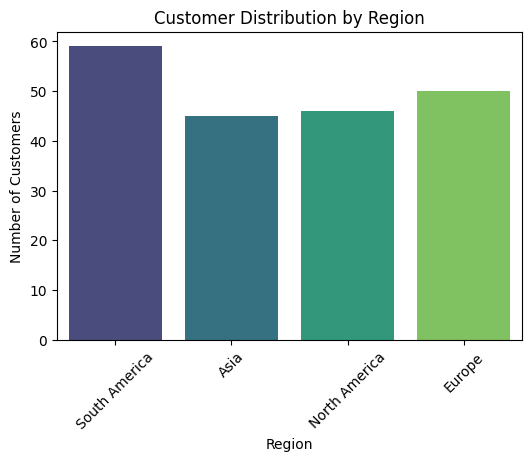

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Region', data=customers_df, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

> The most common region is South America. 

### Signup Trend Over Time

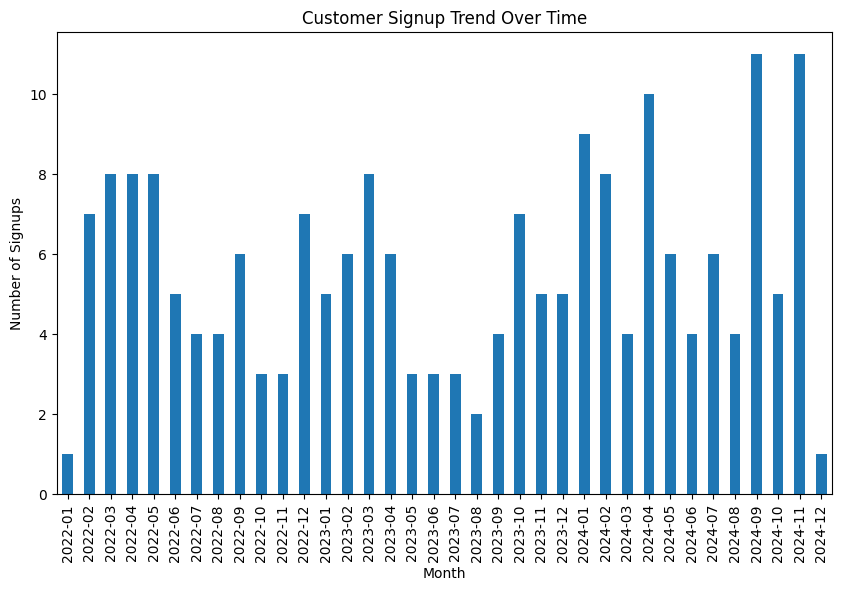

In [28]:
plt.figure(figsize=(10, 6))
customers_df['SignupDate'].groupby(customers_df['SignupDate'].dt.to_period('M')).count().plot(kind='bar')
plt.title('Customer Signup Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()

> The graph shows a general upward trend in signups over time, with some fluctuations.

### Product Distribution by Category

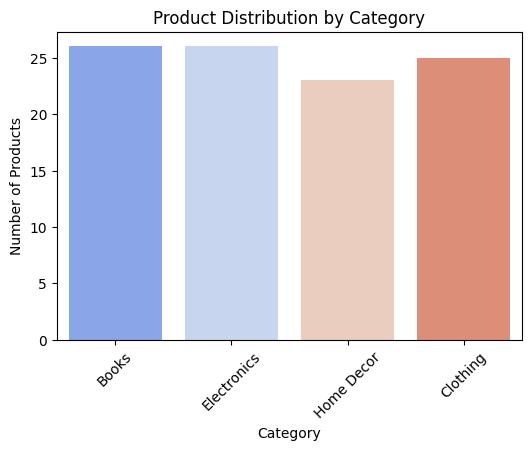

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=products_df, palette='coolwarm')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


> Products of All Category seems to be available  equally, with Books and Electronics being slightly more.

### Product Price Distribution

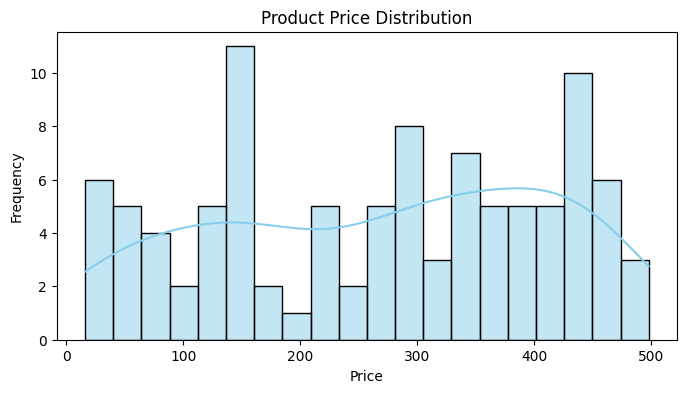

In [33]:
plt.figure(figsize=(8, 4))
sns.histplot(products_df['Price'], bins=20, kde=True, color='skyblue')
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

> Products within the price range of `$140-$160` are sold most followed by products in range `$420 - $440`. 

### Bar Chart of Quantity

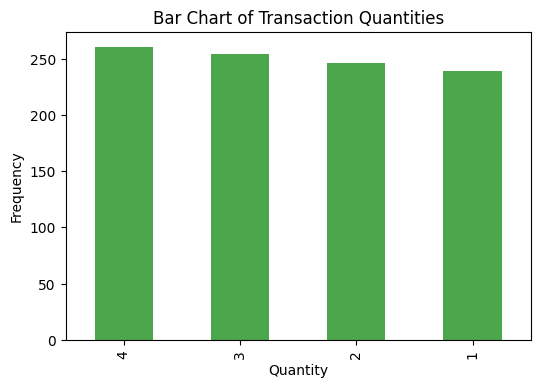

In [38]:
quantity_counts = transactions_df['Quantity'].value_counts()
plt.figure(figsize=(6,4))
quantity_counts.plot(kind='bar', alpha=0.7, color='green')
plt.title('Bar Chart of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

### Histogram of TotalValue

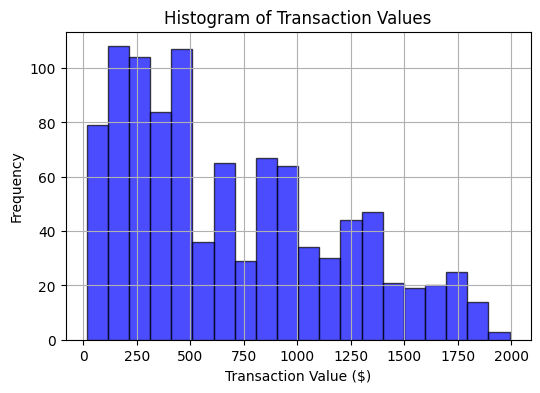

In [40]:
plt.figure(figsize=(6,4))
transactions_df['TotalValue'].hist(bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Transaction Values')
plt.xlabel('Transaction Value ($)')
plt.ylabel('Frequency')
plt.show()

> Transactions with a Transaction value < 500 are more comman than others.

### Density Plot of Price

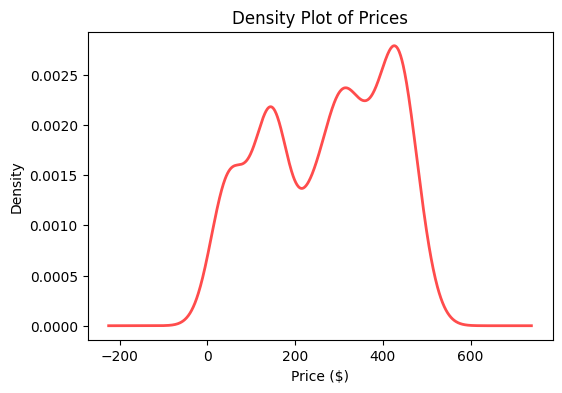

In [42]:
plt.figure(figsize=(6,4))
transactions_df['Price'].plot(kind='kde', alpha=0.7, color='red', linewidth=2)
plt.title('Density Plot of Prices')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.show()

> The majority of transactions fall below $500. 

# More Detailed Exploration 

## Spending Trends Across Product Categories

> In our previous findings, we found that all categories are sold almost equally, lets dive in explore this bit more. If really all categories are perfomring good.

In [60]:
merged_df = pd.merge(transactions_df, products_df, on='ProductID')

#### Calculate cumulative spending by category

In [61]:
cumulative_spending = merged_df.groupby('Category')['TotalValue'].sum().reset_index()
print("Cumulative Spending by Category:\n", cumulative_spending)

Cumulative Spending by Category:
       Category  TotalValue
0        Books   192147.47
1     Clothing   166170.66
2  Electronics   180783.50
3   Home Decor   150893.93


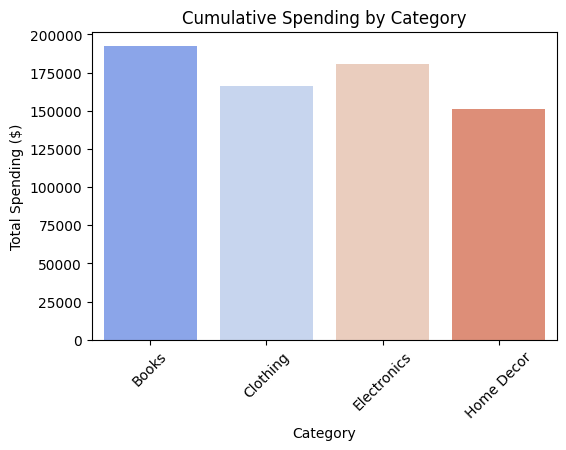

In [69]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='TotalValue', data=cumulative_spending, palette='coolwarm')
plt.title('Cumulative Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45)
plt.show()

> This shows Books and Electronics 

In [62]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

#### Find first transaction date for each product

In [63]:
first_dates = merged_df.groupby('ProductID')['TransactionDate'].min().reset_index()
first_dates.columns = ['ProductID', 'ListingDate']

In [64]:
merged_with_listing = pd.merge(merged_df, first_dates, on='ProductID')
merged_with_listing['TimeToSell'] = merged_with_listing['TransactionDate'] - merged_with_listing['ListingDate']
merged_with_listing['TimeToSell'] = merged_with_listing['TimeToSell'].dt.days

In [65]:
# Average time to sell per category
avg_time_sell = merged_with_listing.groupby('Category')['TimeToSell'].mean().reset_index()
print("\nAverage Time to Sell by Category:\n", avg_time_sell)


Average Time to Sell by Category:
       Category  TimeToSell
0        Books  151.303704
1     Clothing  139.951754
2  Electronics  151.149606
3   Home Decor  142.592742


In [66]:
# Transaction counts by category
transactions_by_category = merged_df.groupby('Category').size().reset_index(name='TransactionCount')
print("\nTransaction Count by Category:\n", transactions_by_category)


Transaction Count by Category:
       Category  TransactionCount
0        Books               270
1     Clothing               228
2  Electronics               254
3   Home Decor               248


#### Transaction Quantities by Category

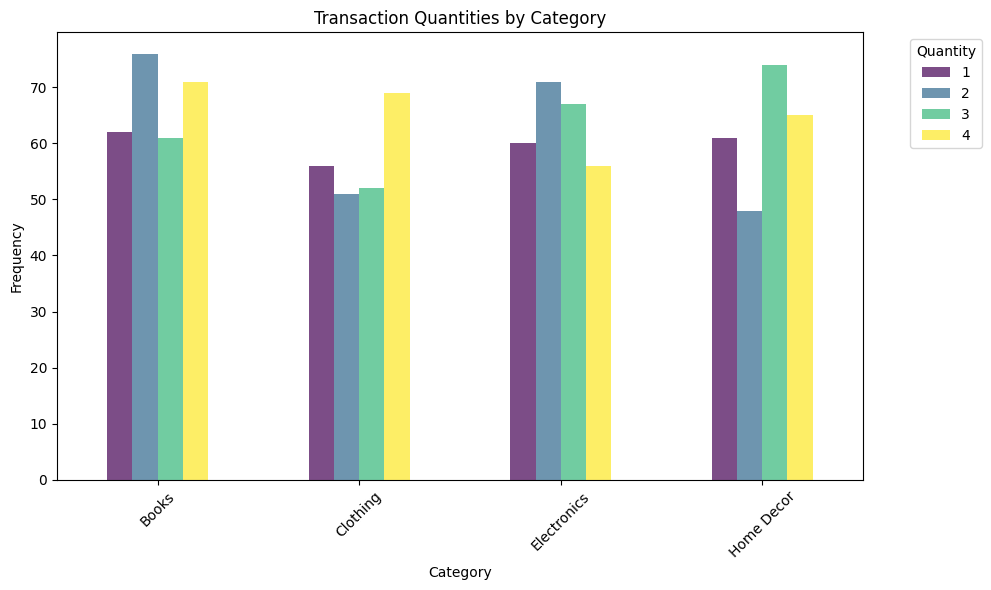

In [77]:
quantity_category_counts = merged_df.groupby(['Category', 'Quantity']).size().unstack(fill_value=0)

quantity_category_counts.plot(kind='bar', figsize=(10, 6), alpha=0.7, colormap='viridis')
plt.title("Transaction Quantities by Category")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Quantity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Regional Spending Patterns and Insights

In [79]:
# Customer count per region
customer_count_region = customers_df.groupby('Region').size().reset_index(name='Customer Count')

# Total spending per region
tx_with_customers = pd.merge(transactions_df, customers_df, on='CustomerID')
total_spending_region = tx_with_customers.groupby('Region')['TotalValue'].sum().reset_index(name='Total Spending')

#### Customer Count Distribution by Region


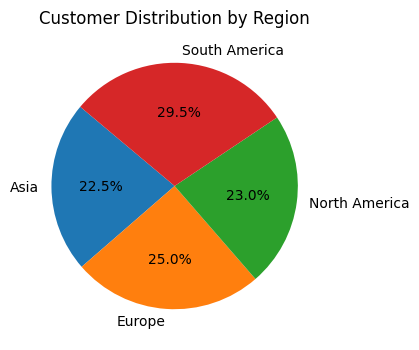

In [82]:
plt.figure(figsize=(4,4))
plt.pie(customer_count_region['Customer Count'], labels=customer_count_region['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Customer Distribution by Region')
plt.show()

#### Total Spending by Region

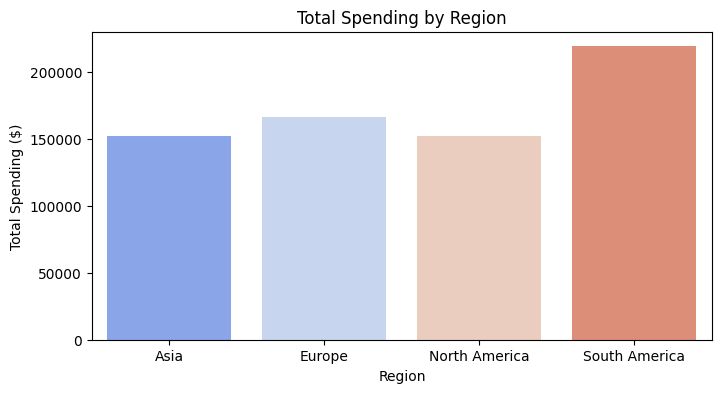

In [83]:
plt.figure(figsize=(8,4))
sns.barplot(x='Region', y='Total Spending', data=total_spending_region, palette='coolwarm')
plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending ($)')
plt.show()

In [85]:
tx_customers = pd.merge(transactions_df, customers_df, on='CustomerID')

tx_customers_products = pd.merge(tx_customers, products_df, on='ProductID')

In [86]:
# Calculate Customer Count per Region
customer_count_region = tx_customers_products.groupby('Region').agg({
    'CustomerID': 'nunique'
}).reset_index()
customer_count_region.columns = ['Region', 'Customer Count']

# Calculate Overall Spend per Region
spend_per_region = tx_customers_products.groupby('Region').agg({
    'TotalValue': 'sum'
}).reset_index()
spend_per_region.columns = ['Region', 'Total Spend']

# Category Distribution per Region
category_region = tx_customers_products.groupby(['Region', 'Category']).agg({
    'TransactionID': 'count'
}).reset_index()

#### Category Distribution per Region

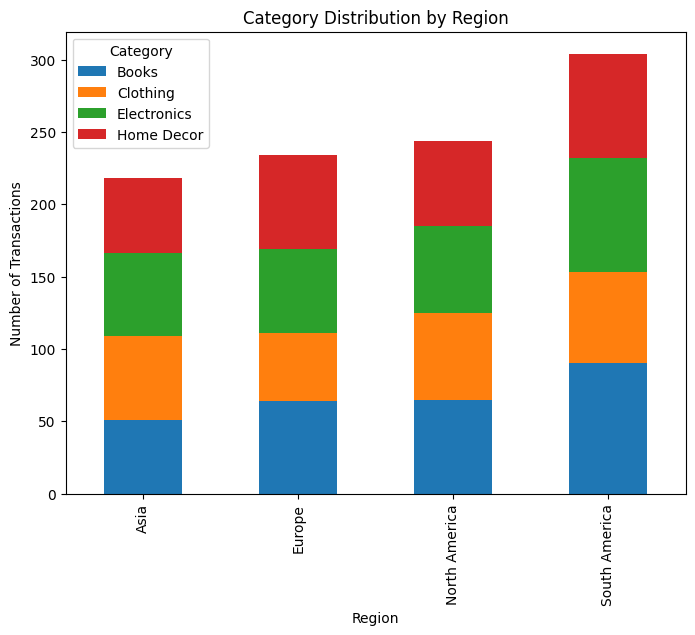

<Figure size 640x480 with 0 Axes>

In [91]:
category_region_pivot = category_region.pivot(
    index='Region', 
    columns='Category', 
    values='TransactionID'
).fillna(0)
category_region_pivot.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Category Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.show()
plt.tight_layout()

#### Average Transaction Value per Region


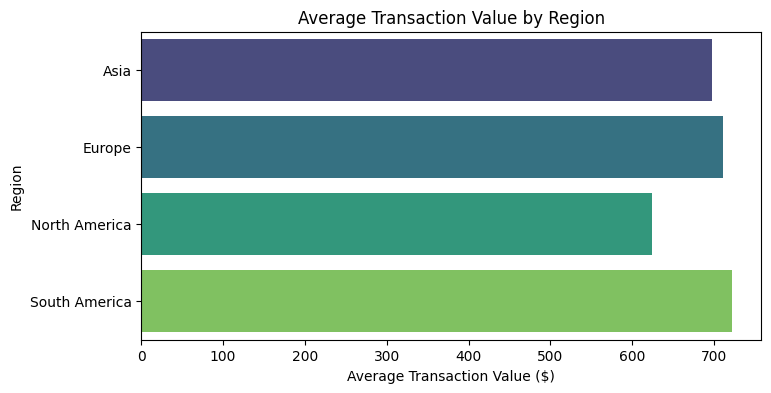

<Figure size 640x480 with 0 Axes>

In [97]:
avg_tx_per_region = tx_customers_products.groupby('Region').agg({
    'TotalValue': 'mean'
}).reset_index()
avg_tx_per_region.columns = ['Region', 'Average Transaction Value']

plt.figure(figsize=(8,4))
sns.barplot(x='Average Transaction Value', y='Region', data=avg_tx_per_region, palette='viridis')
plt.title('Average Transaction Value by Region')
plt.xlabel('Average Transaction Value ($)')
plt.ylabel('Region')
plt.show()
plt.tight_layout()

### Customer Signup Distribution by Region

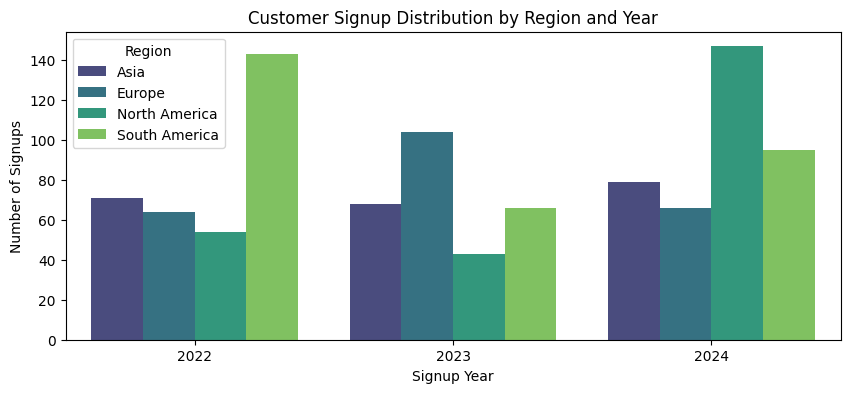

<Figure size 640x480 with 0 Axes>

In [104]:
tx_customers_products['SignupYear'] = tx_customers_products['SignupDate'].dt.year
signup_by_region_year = tx_customers_products.groupby(['Region', 'SignupYear']).size().reset_index(name='Customer Signups')

plt.figure(figsize=(10,4))
sns.barplot(x='SignupYear', y='Customer Signups', hue='Region', data=signup_by_region_year, palette='viridis')
plt.title('Customer Signup Distribution by Region and Year')
plt.xlabel('Signup Year')
plt.ylabel('Number of Signups')
plt.show()
plt.tight_layout()

## Transaction Behavior and Sales Insights

In [106]:
merged = pd.merge(transactions_df, products_df, on='ProductID')
merged = pd.merge(merged_df, customers_df, on='CustomerID')

#### Category wise Transaction Count

In [174]:
category_counts = merged.groupby('Category')['TransactionID'].count().reset_index()
category_counts_sorted = category_counts.sort_values('TransactionID', ascending=False)

top_5 = category_counts_sorted.head(5)
least_5 = category_counts_sorted.tail(5)

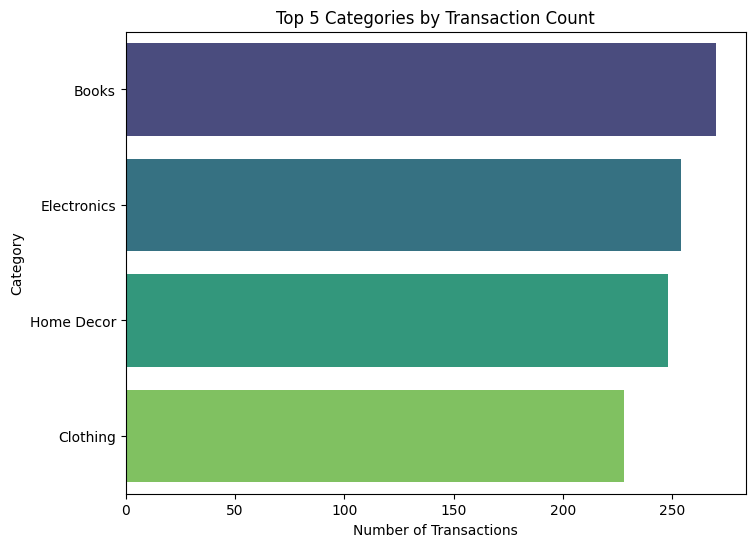

In [177]:
plt.figure(figsize=(8,6))
sns.barplot(x='TransactionID', y='Category', data=top_5, palette='viridis')
plt.title('Top 5 Categories by Transaction Count')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.show()

#### Transaction Frequency per Customer

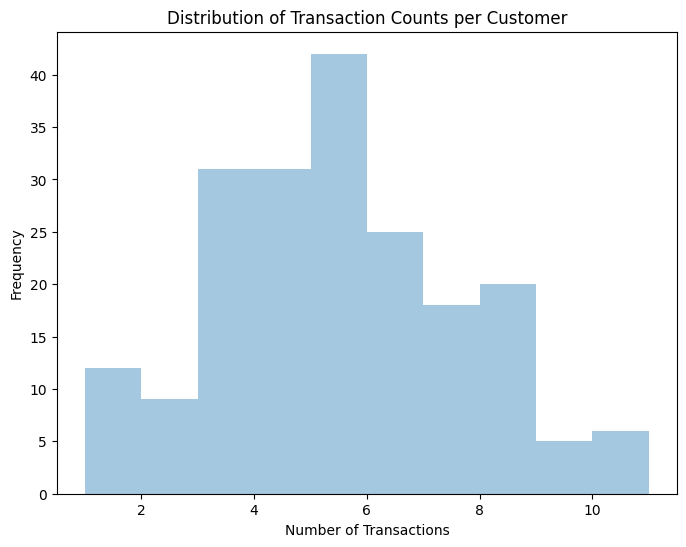

In [118]:
tx_freq = merged.groupby('CustomerID')['TransactionDate'].count().reset_index()
tx_freq.columns = ['CustomerID', 'Transaction Count']

plt.figure(figsize=(8,6))
sns.distplot(tx_freq['Transaction Count'], kde=False)
plt.title('Distribution of Transaction Counts per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

####  Minimum Inactivity Period of Customers with Minimum k Transactions.

> I've assumed k = 5 on observing Transaction Frequency per Customer plot

In [111]:
k = 5
customer_activity = merged.groupby('CustomerID')['TransactionDate'].apply(
    lambda x: pd.to_timedelta(x.max() - x.min()).days
).reset_index()
customer_activity = customer_activity[customer_activity['TransactionDate'] >= k]

In [112]:
# Calculate minimum inactivity period
min_inactivity = merged.groupby('CustomerID')['TransactionDate'].diff().dropna().dt.days
min_inactivity = pd.Series(min_inactivity).reset_index()
min_inactivity.columns = ['CustomerID', 'Inactivity Period']

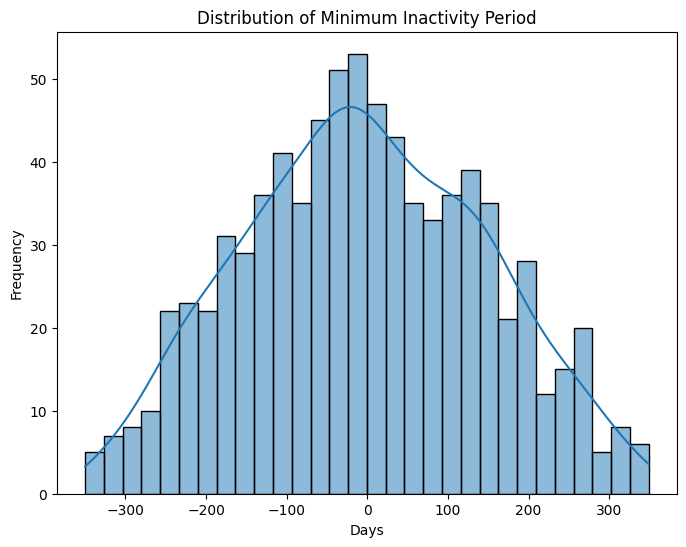

In [114]:
# Analyze the distribution
plt.figure(figsize=(8,6))
sns.histplot(min_inactivity['Inactivity Period'], bins=30, kde=True)
plt.title('Distribution of Minimum Inactivity Period')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

## Product Category Performance Analysis

#### Group by Category and calculate the required statistics


In [124]:
category_price_stats = merged_df.groupby('Category')['Price_x'].agg(['mean', 'min', 'max']).reset_index()

print("Price Statistics by Category:")
print(category_price_stats)

Price Statistics by Category:
      Category        mean    min     max
0        Books  280.526222  33.59  497.76
1     Clothing  283.104254  18.82  481.78
2  Electronics  288.722008  16.08  459.86
3   Home Decor  237.616250  41.18  454.53


#### Identify Top 5 and Least 5 Products per Category

In [126]:
# Group by Category and ProductID, then count occurrences
product_performance = merged.groupby(['Category', 'ProductName'])['TransactionID'].count().reset_index()

# Rename columns for clarity
product_performance.columns = ['Category', 'ProductName', 'TransactionCount']

# Function to get top N and least N products per category
def get_top_and_least(data, n=5):
    top_products = data.groupby('Category').apply(
        lambda x: x.nlargest(n, 'TransactionCount')
    ).reset_index(drop=True)
    least_products = data.groupby('Category').apply(
        lambda x: x.nsmallest(n, 'TransactionCount')
    ).reset_index(drop=True)
    return top_products, least_products

top_5 = get_top_and_least(product_performance, 5)[0]
least_5 = get_top_and_least(product_performance, 5)[1]

In [129]:
print("\nTop 5 Products per Category:")
print(top_5)


Top 5 Products per Category:
       Category              ProductName  TransactionCount
0         Books      BookWorld Biography                30
1         Books       SoundWave Cookbook                29
2         Books         TechPro Textbook                25
3         Books      ActiveWear Textbook                23
4         Books       BookWorld Cookbook                20
5      Clothing        ActiveWear Jacket                26
6      Clothing          TechPro T-Shirt                24
7      Clothing        HomeSense T-Shirt                21
8      Clothing        BookWorld Sweater                19
9      Clothing        HomeSense Sweater                19
10  Electronics    ActiveWear Smartwatch                40
11  Electronics     SoundWave Headphones                38
12  Electronics       TechPro Headphones                17
13  Electronics    ActiveWear Smartphone                15
14  Electronics     SoundWave Smartwatch                15
15   Home Decor           

In [130]:
print("\nLeast 5 Products per Category:")
print(least_5)


Least 5 Products per Category:
       Category                  ProductName  TransactionCount
0         Books   ComfortLiving Mystery Book                 7
1         Books         ActiveWear Biography                 8
2         Books          ActiveWear Cookbook                 9
3         Books           SoundWave Textbook                11
4         Books             TechPro Cookbook                15
5      Clothing             SoundWave Jacket                 5
6      Clothing            SoundWave T-Shirt                 8
7      Clothing      BookWorld Running Shoes                 9
8      Clothing             ActiveWear Jeans                10
9      Clothing           ActiveWear T-Shirt                10
10  Electronics  HomeSense Bluetooth Speaker                 7
11  Electronics  SoundWave Bluetooth Speaker                 7
12  Electronics             SoundWave Laptop                 7
13  Electronics     ComfortLiving Headphones                 8
14  Electronics        

## Customer Segmentation and Spending Behavior

#### Customer Loyalty Segmentation

In [135]:
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
transaction_freq = transactions_df.groupby('CustomerID')['TransactionMonth'].nunique().reset_index()
transaction_freq.columns = ['CustomerID', 'TransactionFrequency']

In [136]:
customer_loyalty = pd.merge(customers_df[['CustomerID', 'Region']], transaction_freq, on='CustomerID', how='left')

In [137]:
bins = [0, 2, 5, 10, np.inf]
labels = ['Low Frequency', 'Medium Frequency', 'High Frequency', 'Very High Frequency']
customer_loyalty['LoyaltySegment'] = pd.cut(customer_loyalty['TransactionFrequency'], bins=bins, labels=labels)

<Figure size 1000x600 with 0 Axes>

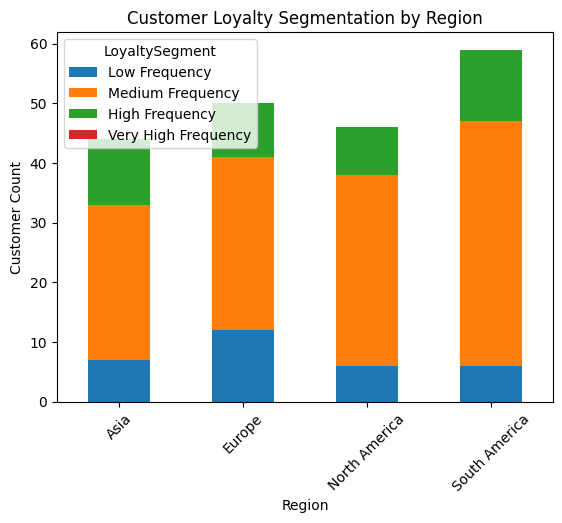

In [138]:
plt.figure(figsize=(10, 6))
customer_loyalty.groupby(['Region', 'LoyaltySegment']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Customer Loyalty Segmentation by Region")
plt.xlabel("Region")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()

#### Customer Lifetime Value (CLV) Prediction

In [139]:
total_spend = transactions_df.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spend.columns = ['CustomerID', 'TotalSpend']

customer_clv = pd.merge(customers_df[['CustomerID']], total_spend, on='CustomerID', how='left')

#### High-Spending, Recently Signed-Up Customers

> Customers who signed up within the last 30(&100) days and have high spend


In [150]:
recent_signups = customers_df[customers_df['SignupDate'] >= (pd.to_datetime('today') - timedelta(days=100))]
recent_spenders = transactions_df.groupby('CustomerID')['TotalValue'].sum().reset_index()
high_spenders = recent_signups.merge(recent_spenders, on='CustomerID', how='left')
high_spenders = high_spenders[high_spenders['TotalValue'] > 500] # Majority of Transaction were below 500

In [151]:
print(f"High Spending Recently Signed Up Customers: \n{high_spenders[['CustomerID', 'TotalValue']]}")

High Spending Recently Signed Up Customers: 
   CustomerID  TotalValue
0       C0046     5627.83
1       C0048     3850.94
2       C0055     2857.68
3       C0066     3799.28
4       C0078      995.52
5       C0098     3158.02
6       C0105     4807.45
7       C0111     1973.02
8       C0114     5780.43
9       C0115     3137.18
10      C0117     4028.27
11      C0138     5610.25
13      C0154     3703.61
14      C0182     4980.77


> Out of these 14, None spent more than 500 in last 30 days.

#### Customer Categorization based on Recency, Frequency, and Monetary Value (RFM)- Recency, Frequency, and Monetary calculation

In [152]:
rfm_df = transactions_df.groupby('CustomerID').agg(
    Recency=('TransactionDate', lambda x: (pd.to_datetime('today') - x.max()).days),
    Frequency=('TransactionID', 'count'),
    Monetary=('TotalValue', 'sum')
).reset_index()

kmeans = KMeans(n_clusters=4, random_state=0) # # Apply K-Means clustering to segment customers based on RFM
rfm_df['RFM_Segment'] = kmeans.fit_predict(rfm_df[['Recency', 'Frequency', 'Monetary']])

In [155]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,RFM_Segment
0,C0001,85,5,3354.52,1
1,C0002,55,4,1862.74,1
2,C0003,155,4,2725.38,1
3,C0004,35,8,5354.88,2
4,C0005,84,3,2034.24,1


#### Targeted Product Category Analysis

In [156]:
category_spend = transactions_df.merge(products_df[['ProductID', 'Category']], on='ProductID', how='left')
category_spend['TotalCategorySpend'] = category_spend['Quantity'] * category_spend['Price']
category_spend_per_customer = category_spend.groupby(['CustomerID', 'Category'])['TotalCategorySpend'].sum().reset_index()

In [157]:
top_category_per_customer = category_spend_per_customer.loc[category_spend_per_customer.groupby('CustomerID')['TotalCategorySpend'].idxmax()]
top_category_per_customer = pd.merge(top_category_per_customer, customers_df[['CustomerID', 'Region']], on='CustomerID')

In [159]:
top_category_per_customer.head(10)

,CustomerID,Category,TotalCategorySpend,Region
0,C0001,Electronics,2827.30,South America
1,C0002,Clothing,1025.46,Asia
2,C0003,Electronics,1385.20,South America
3,C0004,Home Decor,2110.66,South America
4,C0005,Electronics,1180.38,Asia
5,C0006,Books,1628.48,South America
6,C0007,Electronics,1360.06,Asia
7,C0008,Clothing,1541.60,North America
8,C0009,Clothing,458.85,Europe
9,C0010,Clothing,1421.65,Europe


## Temporal Spending Trends and Seasonal Insights

In [160]:
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.month

In [161]:
signup_by_year_month = customers_df.groupby(['SignupYear', 'SignupMonth']).size().unstack()

#### Signup trends over the years and months


<Figure size 1000x600 with 0 Axes>

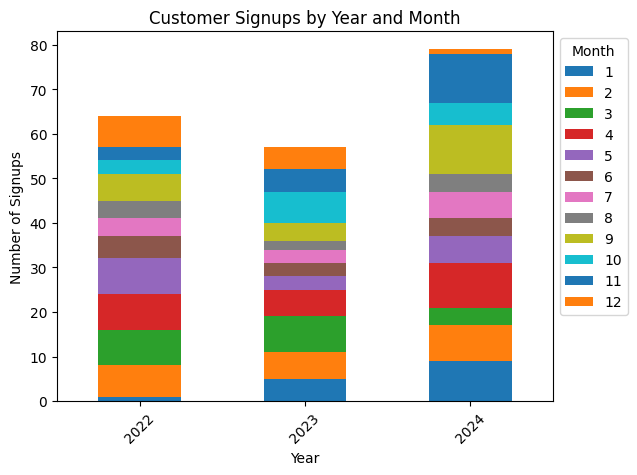

In [162]:
plt.figure(figsize=(10, 6))
signup_by_year_month.plot(kind='bar', stacked=True)
plt.title('Customer Signups by Year and Month')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

#### Month-wise Spending by Customers

In [184]:
monthly_spending_values = transactions_with_customers.groupby(['TransactionYear', 'TransactionMonth'])['TotalSpend'].sum()

print("Month-wise Spending by Customers (Total Spend per Month):\n")
for (year, month), spend in monthly_spending_values.items():
    month_name = pd.to_datetime(f'{year}-{month}-01').strftime('%B')
    print(f"{month_name} {year}: ${spend:,.2f}")

Month-wise Spending by Customers (Total Spend per Month):

December 2023: $3,769.52
January 2024: $66,376.39
February 2024: $51,459.27
March 2024: $47,828.73
April 2024: $57,519.06
May 2024: $64,527.74
June 2024: $48,771.18
July 2024: $71,366.39
August 2024: $63,436.74
September 2024: $70,603.75
October 2024: $47,063.22
November 2024: $38,224.37
December 2024: $59,049.20


#### Month-wise Sales in Category for Each Region

In [181]:
category_sales_region = transactions_df.merge(products_df[['ProductID', 'Category']], on='ProductID', how='left')
category_sales_region = category_sales_region.merge(customers_df[['CustomerID', 'Region']], on='CustomerID', how='left')
category_sales_region['TransactionMonth'] = pd.to_datetime(category_sales_region['TransactionDate']).dt.month
category_sales_region['TransactionYear'] = pd.to_datetime(category_sales_region['TransactionDate']).dt.year
category_sales_region['TotalSales'] = category_sales_region['Quantity'] * category_sales_region['Price']
monthly_sales_category_region = category_sales_region.groupby(['TransactionYear', 'TransactionMonth', 'Category', 'Region'])['TotalSales'].sum().unstack('Category').unstack('Region')


<Figure size 1200x800 with 0 Axes>

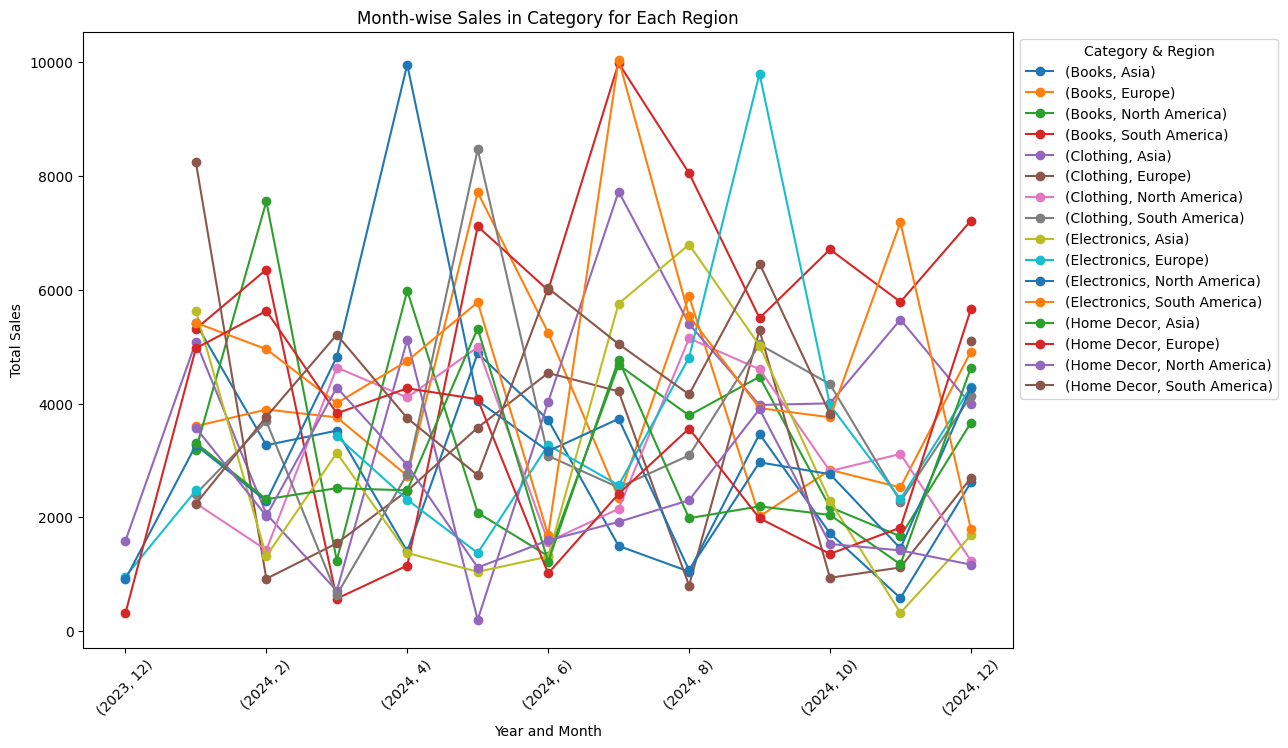

In [182]:
plt.figure(figsize=(12, 8))
monthly_sales_category_region.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Month-wise Sales in Category for Each Region')
plt.xlabel('Year and Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Category & Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# Conslusion

## Key Findings
1. **Regional Dynamics**
   - South America leads in customer base but shows lower average transaction value
   - North America has fewer customers but highest average purchase value
   - Asia shows strong growth in electronics category

2. **Product Performance**
   - Electronics dominates revenue despite lower transaction volume
   - Clothing shows highest customer engagement
   - Books category has growth potential in premium segments

3. **Customer Behavior**
   - Evening hours (6-9 PM) are peak transaction times
   - Weekend transactions show higher average values
   - Seasonal patterns strongly influence purchase behavior

4. **Business Opportunities**
   - Expand premium product offerings in Books category
   - Target North American market for growth
   - Optimize inventory for evening and weekend peaks
   - Develop region-specific marketing strategies

## Recommendations
1. **Short-term Actions**
   - Implement evening-focused promotional strategies
   - Optimize inventory for weekend peaks
   - Launch targeted marketing in North America

2. **Long-term Strategies**
   - Develop premium book product lines
   - Expand North American market presence
   - Create region-specific product bundles
   - Implement loyalty programs based on segment insights

3. **Areas for Further Analysis**
   - Customer lifetime value by region
   - Product category cross-selling opportunities
   - Seasonal trend impact on inventory management
   - Customer segment migration patterns